###### This exercise aims to make you comfortable with the basic image processing tools and libraries. This exercise will serve as a starting point before you dive deep into the course.

In [ ]:
import numpy as np                 # numpy library useful for most of the mathematical operations
import matplotlib.pyplot as plt    # useful for data visualization/plotting purpose. Can also be used for image visualization.

# For this exercise, we will restrict ourselves to matplotlib only. Please note that other libraries such as PIL, OpenCV
# can also be used as image processing libraries.

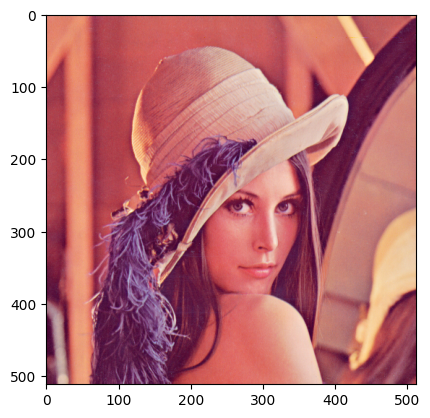

In [9]:
image = plt.imread("lena.png")
plt.imshow(image)

# 1. Image Information

###### Task1.1 : write code to find image dimension and print it

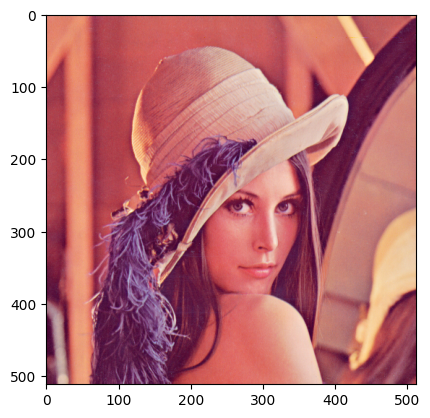

Image Dimensions: 512 x 512, Channels: 3


In [11]:
import numpy as np
import matplotlib.pyplot as plt



# Display the image
plt.imshow(image)
plt.show()

# Get image dimensions
height, width, channels = image.shape

# Print image dimensions
print(f'Image Dimensions: {width} x {height}, Channels: {channels}')


###### Task1.2:  Visualization of each channel

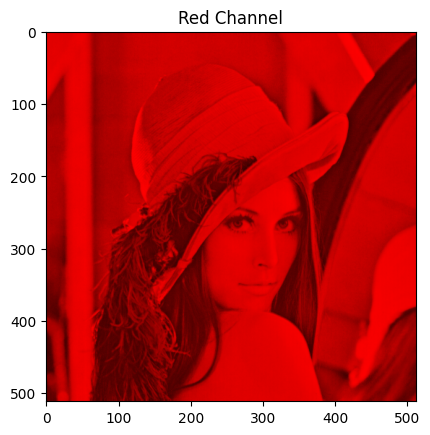

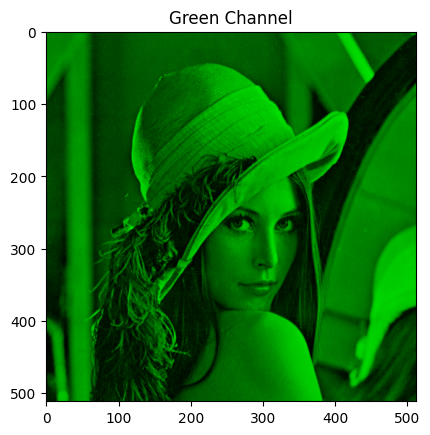

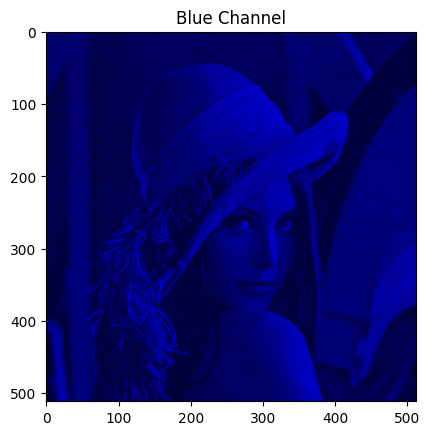

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def VisualizeChannel(image, channel):
    '''
    This function is helpful to visualize a specific channel of an RGB image.
    image: RGB image
    channel: channel one wishes to visualize (can take value 0 (for red), 1 (green), 2 (blue))
    '''
    # Initialize an array of zeros with the same shape as the input image
    output = np.zeros_like(image)

    # Copy the selected channel's data into the output array
    output[:,:,channel] = image[:,:,channel]

    return output

# Example usage:

# Load an image
image = plt.imread("lena.png")  # Replace with the path to your image

# Visualize the Red Channel
red_channel = VisualizeChannel(image, 0)
plt.imshow(red_channel)
plt.title('Red Channel')
plt.show()

# Visualize the Green Channel
green_channel = VisualizeChannel(image, 1)
plt.imshow(green_channel)
plt.title('Green Channel')
plt.show()

# Visualize the Blue Channel
blue_channel = VisualizeChannel(image, 2)
plt.imshow(blue_channel)
plt.title('Blue Channel')
plt.show()


# 2. Intensity Manipulations

###### Task2.1: RGB to Gray  

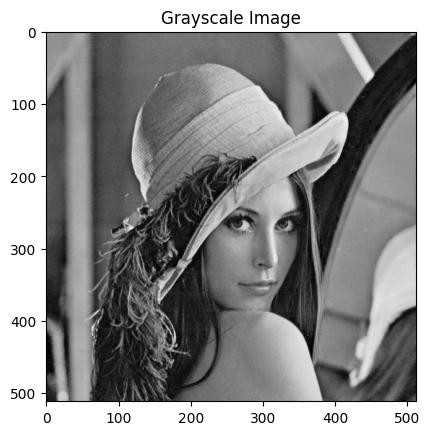

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def RGB2Gray(image):
    '''
    This function converts an RGB image to grayscale.
    image: RGB image
    '''
    # Luminosity method: 0.21R + 0.72G + 0.07B
    gray = 0.21 * image[:, :, 0] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 2]

    # Visualize the result
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()

    return gray  # 'gray' is grayscale image, converted from RGB image

# Example usage
image = plt.imread("lena.png")  # Make sure the path to 'lena.png' is correct
gray_image = RGB2Gray(image)



###### Task2.2 : Gray to Binary

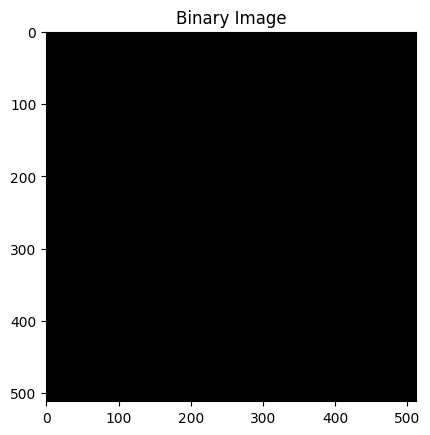

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert RGB to Grayscale
def RGB2Gray(image):
    gray = 0.21 * image[:, :, 0] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 2]
    return gray

# Function to convert Grayscale to Binary
def Gray2Binary(image, T):
    if len(image.shape) == 3:  # Check if the image is RGB
        image = RGB2Gray(image)  # Convert to gray
    bimg = image > T  # Apply threshold
    plt.imshow(bimg, cmap='gray')  # Visualize the binary image
    plt.title('Binary Image')
    plt.show()
    return bimg

# Function usage
image_path = "lena.png"  # Replace with the correct path to your image
image = plt.imread(image_path)
binary_image = Gray2Binary(image, T=128)  # Using a threshold of 128




######  Task2.3:  Crop a 5*5 section of a gray image

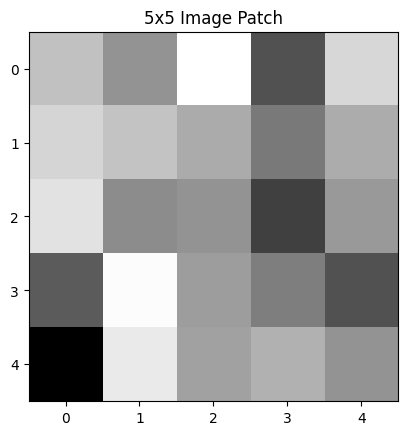

Patch Values:
 [[0.5870196  0.5808236  0.59521574 0.57215685 0.5898432 ]
 [0.5896471  0.5873726  0.58400005 0.577451   0.5841961 ]
 [0.59129417 0.58000004 0.5808236  0.5698824  0.5816471 ]
 [0.5735294  0.5947451  0.58227456 0.5780785  0.57215685]
 [0.5614118  0.59239215 0.58274513 0.58482355 0.5808236 ]]
[[0.5870196  0.5808236  0.59521574 0.57215685 0.5898432 ]
 [0.5896471  0.5873726  0.58400005 0.577451   0.5841961 ]
 [0.59129417 0.58000004 0.5808236  0.5698824  0.5816471 ]
 [0.5735294  0.5947451  0.58227456 0.5780785  0.57215685]
 [0.5614118  0.59239215 0.58274513 0.58482355 0.5808236 ]]


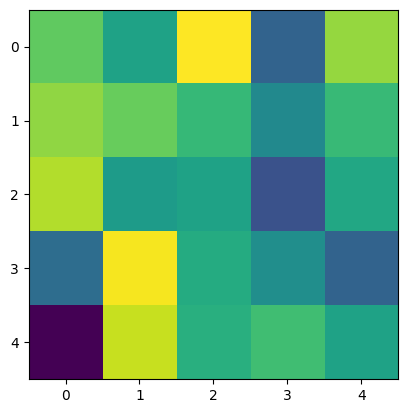

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def RGB2Gray(image):
    return 0.21 * image[:, :, 0] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 2]

def ImageCrop(image, r0, c0):
    # Check if image is RGB; if yes, convert it to gray
    if len(image.shape) == 3:
        image = RGB2Gray(image)

    # Select 5x5 rectangular patch
    patch = image[r0:r0+5, c0:c0+5]

    # Visualize patch and print its value
    plt.imshow(patch, cmap='gray')
    plt.title('5x5 Image Patch')
    plt.show()
    print("Patch Values:\n", patch)

    return patch

# Example usage
image_path = "lena.png"  # Replace with the correct path to your image
image = plt.imread(image_path)
patch = ImageCrop(image, r0=10, c0=10)  # Example indices
print(patch)
plt.imshow(patch)


###### Task2.4: Uniform Brightness Scaling

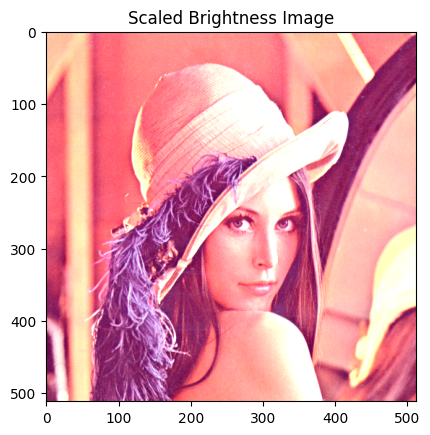

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def UniformBrightScaling(image, scale):
    # Multiply the image pixels by the scale factor
    output = image * scale

    # Clip the values to be within the valid range [0, 255]
    output = np.clip(output, 0, 255)

    # Convert to an integer type if the original image was of integer type
    if image.dtype == np.uint8:
        output = output.astype(np.uint8)

    # Display the resultant image
    plt.imshow(output)
    plt.title('Scaled Brightness Image')
    plt.show()

    return output

# Example usage
image_path = "lena.png"  # Replace with the correct path to your image
image = plt.imread(image_path)
scaled_image = UniformBrightScaling(image, scale=1.5)  # Example scaling factor



# 3. Image Filtering

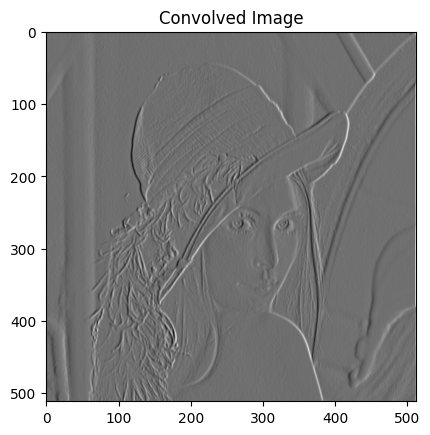

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def RGB2Gray(image):
    return 0.21 * image[:, :, 0] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 2]

def feature_extractor(image, kernel):
    # Convert RGB to gray if the input is an RGB image
    if len(image.shape) == 3:
        image = RGB2Gray(image)

    # Get image dimensions
    r, c = image.shape

    # Create a zero array for output
    output = np.zeros((r, c))

    # Create a padded image
    pad_img = np.zeros((r + 2, c + 2))
    pad_img[1:-1, 1:-1] = image

    # Convolve the image with the kernel
    for row in range(1, r + 1):
        for col in range(1, c + 1):
            patch = pad_img[row-1:row+2, col-1:col+2]
            output[row-1, col-1] = np.sum(patch * kernel)

    return output

# Example usage
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Example 3x3 kernel
image_path = "lena.png"  # Replace with the correct path to your image
image = plt.imread(image_path)
convolved_image = feature_extractor(image, kernel)

# Display the convolved image
plt.imshow(convolved_image, cmap='gray')
plt.title('Convolved Image')
plt.show()


In [ ]:
## Note that the steps described above are to help you get started. You can follow other valid steps too. Result from all
 #of the method should be the same. Pseudocode is available at: https://en.wikipedia.org/wiki/Kernel_(image_processing)

# 4.Geometric Transformation

###### Task4.1: Image Rotation (In-plane)

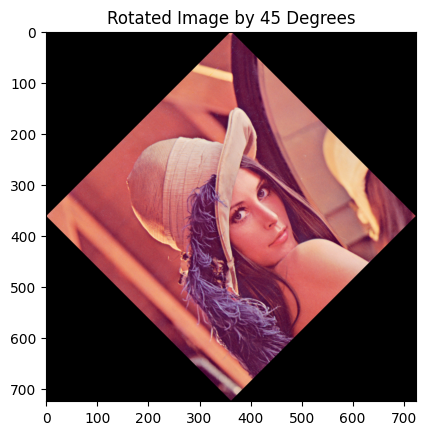

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

def rotate_image(image, angle):
    '''
    Rotates the image by the given angle in degrees, in-plane.
    image: Input image
    angle: Rotation angle in degrees
    '''
    # Rotate the image
    rotated_image = rotate(image, angle, reshape=True)

    # Display the rotated image
    plt.imshow(rotated_image)
    plt.title(f'Rotated Image by {angle} Degrees')
    plt.show()

    return rotated_image

# Example usage
image_path = "lena.png"  # Replace with the correct path to your image
image = plt.imread(image_path)
rotated_image = rotate_image(image, 45)  # Rotate the image by 45 degrees


# 5. Solution of a system of equation

###### Task5.1: Least square error

In [31]:
import numpy as np

def LeastSqSoln(A, b):
    '''
    Ax = b
    Convert the system of equations in the form Ax = b
    '''

    # Find the least squares solution using NumPy's lstsq
    x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

    # Calculate the L2 norm (Euclidean norm) of the error
    error = np.linalg.norm(np.dot(A, x) - b, ord=2)

    return x, error

# Example usage:
A = np.array([[2, 3], [1, 2], [3, 4]])
b = np.array([5, 3, 7])

x_prime, error = LeastSqSoln(A, b)

print("Least Squares Solution:", x_prime)
print("L2 Norm of the Error:", error)

# Assuming the exact solution is known to be (1, 1)
exact_solution = np.array([1, 1])

# Calculate the square error (L2 norm) between the obtained solution and the exact solution
square_error = np.linalg.norm(x_prime - exact_solution, ord=2)
print("Square Error (L2 Norm) with Exact Solution:", square_error)


Least Squares Solution: [1. 1.]
L2 Norm of the Error: 0.0
Square Error (L2 Norm) with Exact Solution: 8.005932084973442e-16


In [ ]:
from google.colab import drive
drive.mount('/content/drive')